# PHYS 404-Spring 2021: Homework #5

## Homework:
Undergraduate student:
A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method and plot height (z) vs time (t).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}, y[4]=z, y[5]=v_{z}

def f(t, y):
    f=np.zeros(6)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2]+(y[4]+R)*(y[4]+R))
    f[0]=y[1] # x
    f[1]=0    # vx
    f[2]=y[3] # y
    f[3]=0    # vy
    f[4]=y[5] # z
    f[5]=-G*M/r/r/r*(y[4]+R) # vz
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2*(k2+k3)+k4)/6.
    return y

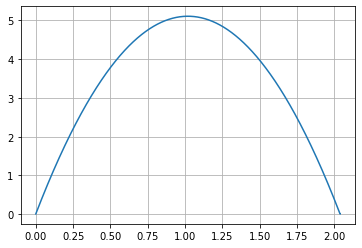

In [3]:
G = 6.6743015e-11
R = 6.3781e6
M = 5.972e24

# print(-G*M/R/R/R*R, 'm/s^2')

tend=2.04
t=0
h=0.001

x0=0.
vx0=0.
y0=0.
vy0=0.
z0=0.
vz0=10.

#  x   vx  y   vy  z  vz
y=[x0, vx0, y0, vy0, z0, vz0]
t_tot=[]

xp=[]
yp=[]
zp=[]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    t_tot=np.append(t_tot,t)
    y = rk4(t,h,y,6)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    zp=np.append(zp,y[4])
    t = t+h

plt.plot(t_tot,zp)
plt.grid()
plt.show()